In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Read the CSV file
df = pd.read_csv('results.csv')

# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_name         511 non-null    object 
 1   scene_number       511 non-null    int64  
 2   resolution         511 non-null    object 
 3   square_size        511 non-null    int64  
 4   horizontal_stride  511 non-null    int64  
 5   vertical_stride    511 non-null    int64  
 6   neighbor_length    511 non-null    int64  
 7   ref_stride         511 non-null    int64  
 8   subvideo_length    511 non-null    int64  
 9   mse_ori_mean       511 non-null    float64
 10  psnr_ori_mean      511 non-null    float64
 11  ssim_ori_mean      511 non-null    float64
 12  vmaf_ori_mean      511 non-null    float64
 13  mse_inp_mean       511 non-null    float64
 14  psnr_inp_mean      511 non-null    float64
 15  ssim_inp_mean      511 non-null    float64
 16  vmaf_inp_mean      511 non

In [26]:
# scene number makes more sense as a string
df = df.astype({'scene_number': str})

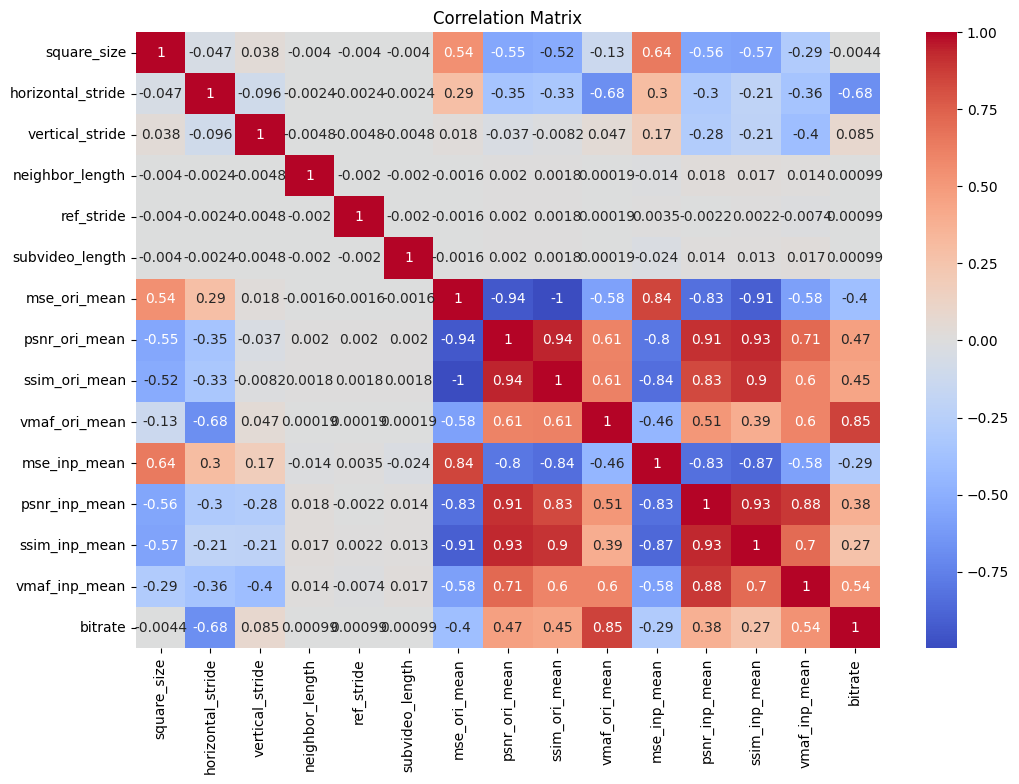

In [27]:
# Correlation matrix to see how parameters are related
correlation_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

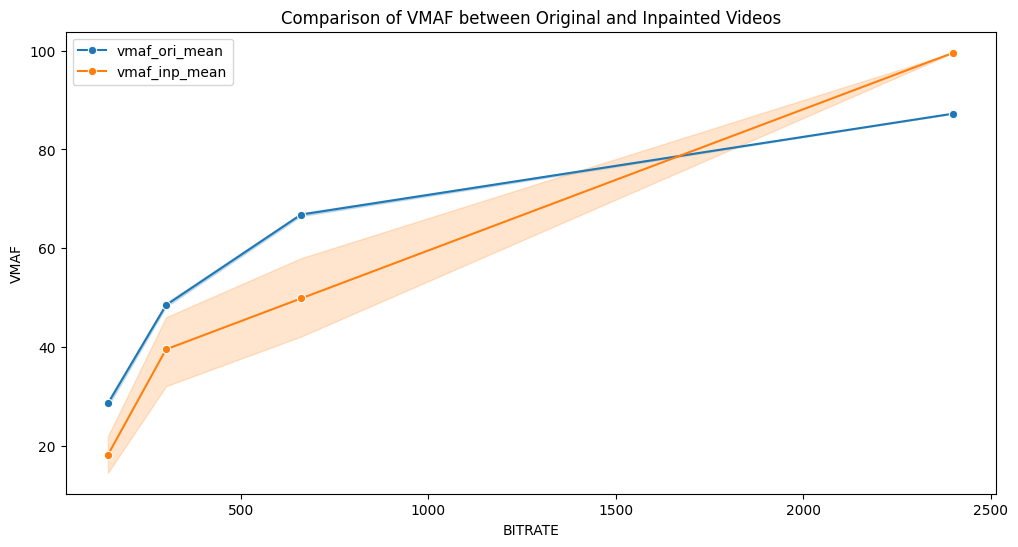

In [37]:
# Function to plot comparison between original and inpainted results
def plot_comparison(df, metric, parameter):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=parameter, y=f'{metric}_ori_mean', label=f'{metric}_ori_mean', marker='o')
    sns.lineplot(data=df, x=parameter, y=f'{metric}_inp_mean', label=f'{metric}_inp_mean', marker='o')
    plt.title(f'Comparison of {metric.upper()} between Original and Inpainted Videos')
    plt.xlabel(parameter.upper())
    plt.ylabel(metric.upper())
    plt.legend()
    plt.show()

# Plot comparisons for each metric
metrics = ['vmaf'] # 'mse', 'psnr', 'ssim'
parameters = ['bitrate'] # 'bitrate', 'resolution', 'square_size', 'horizontal_stride', 'vertical_stride', 'neighbor_length', 'ref_stride', 'subvideo_length'
for metric in metrics:
    for parameter in parameters:
        plot_comparison(df[df.vertical_stride == 1], metric, parameter)

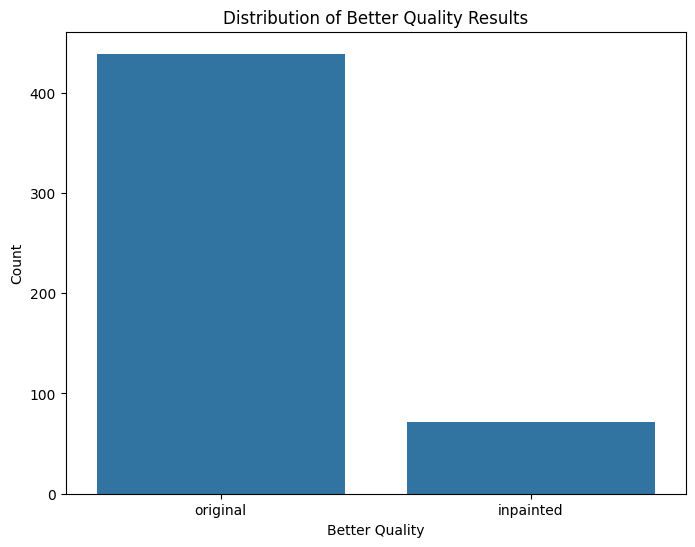

In [29]:
# Identify which scenes have better quality for original vs inpainted
df['better_quality'] = df.apply(lambda row: 'original' if row['vmaf_ori_mean'] > row['vmaf_inp_mean'] else 'inpainted', axis=1)

# Visualize the distribution of better quality results
plt.figure(figsize=(8, 6))
sns.countplot(x='better_quality', data=df)
plt.title('Distribution of Better Quality Results')
plt.xlabel('Better Quality')
plt.ylabel('Count')
plt.show()